In [1]:
#Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#read train data
train_test = pd.read_csv('train.csv')

#read validate data
df_validate = pd.read_csv('test.csv')

In [3]:
train_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df_validate.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


# Working on train_test data

In [5]:
df = train_test.copy()
df.head(1)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370


In [6]:
df.shape

(550068, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

### EDA

##### User_ID 


In [9]:

df['User_ID'].nunique()
#there are 5891 unique values

5891

In [10]:
df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1000094       7
1002111       7
1004991       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

Text(0, 0.5, 'Count')

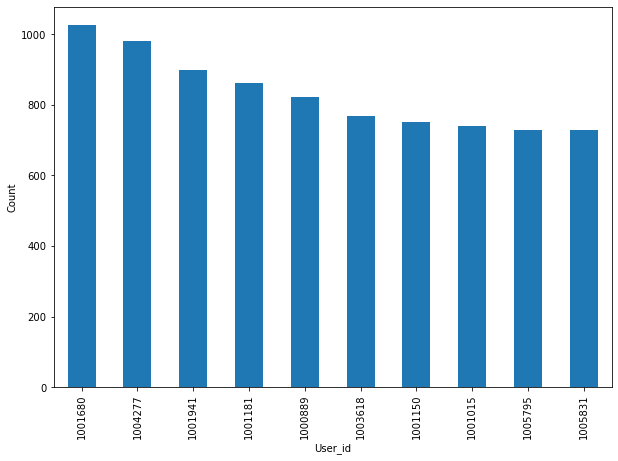

In [11]:
plt.figure(figsize=(10,7))
df['User_ID'].value_counts().head(10).plot(kind='bar')
plt.xlabel('User_id')
plt.ylabel('Count')

#User_id 1001680, has purchased most number of products

In [12]:
df.groupby(by='User_ID')['Purchase'].sum().nlargest(5)

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
Name: Purchase, dtype: int64

##### Product_id

In [13]:
df['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00160742       1
P00069742       1
P00308042       1
P00075042       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [14]:
df['Product_ID'].nunique()

3631

##### Gender

In [15]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [16]:
pd.pivot_table(df, values='Purchase', index='Gender', aggfunc=np.sum)

#Male customers have purchased 3times more than female

,Purchase
Gender,
F,1186232642
M,3909580100


In [17]:
pd.pivot_table(df, values='Purchase', index='Gender', aggfunc=np.mean)
#On average male customer prchase more

,Purchase
Gender,
F,8734.565765
M,9437.526040


##### Age

In [18]:
df['Age'].nunique()

7

In [19]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
pd.pivot_table(df, values='Purchase', index='Age', aggfunc=np.mean)

,Purchase
Age,
0-17,8933.464640
18-25,9169.663606
26-35,9252.690633
36-45,9331.350695
46-50,9208.625697
51-55,9534.808031
55+,9336.280459


In [21]:
pd.pivot_table(df, values='Purchase', index='Age', aggfunc=np.sum)

,Purchase
Age,
0-17,134913183
18-25,913848675
26-35,2031770578
36-45,1026569884
46-50,420843403
51-55,367099644
55+,200767375


##### Occupation

In [22]:
df['Occupation'].nunique()

21

In [23]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

##### City_Category

In [24]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

##### Stay_In_Current_City_Years

In [25]:
df['Stay_In_Current_City_Years'].uniqueque()

AttributeError: 'Series' object has no attribute 'uniqueque'

##### Purchase

<AxesSubplot:xlabel='Purchase'>

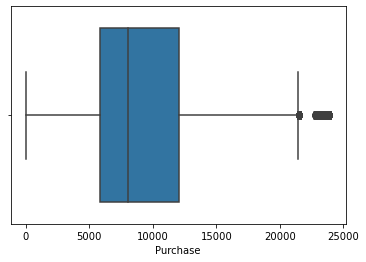

In [26]:
sns.boxplot(df['Purchase'])
#there are outliers

<AxesSubplot:xlabel='Purchase', ylabel='Density'>

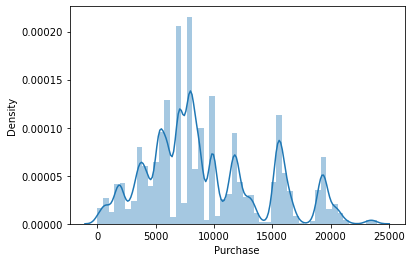

In [27]:
sns.distplot(df['Purchase'])

### Data pre-processing

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


#### Duplicate records

In [29]:
df.duplicated().value_counts()

#There are no duplicate values

False    550068
dtype: int64

#### Outier analysis


In [30]:

q1 = df['Purchase'].quantile(0.25)

q3 = df['Purchase'].quantile(0.75)

iqr = q3 - q1

ul = q3 + 1.5*iqr
ll = q1 - 1.5*iqr

In [31]:
df[(df['Purchase']<ll) | (df['Purchase']>ul)].shape

(2677, 12)

In [32]:
2677/550068 * 100
#There are 0.48% of outliers in overall data

0.4866671029763593

In [33]:
df = df[~((df['Purchase']<ll) | (df['Purchase']>ul))]

In [34]:
df.shape

(547391, 12)

#### Null value

In [35]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173226
Product_Category_3            381211
Purchase                           0
dtype: int64

In [36]:
# there are null values in Product_Category_2 & Product_Category_3

In [37]:
df['Product_Category_2'].unique()
#Product may belongs to other category also

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [38]:
#we impute the null values to Product_Category_2 & Product_Category_3 with 0, becuase they dont belong to any category

In [39]:
df = df.fillna(0)

In [40]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

####  Split the data

In [41]:
y = df['Purchase']

X = df.drop('Purchase', axis=1)

#### LAbel encoding

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547391 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     547391 non-null  int64  
 1   Product_ID                  547391 non-null  object 
 2   Gender                      547391 non-null  object 
 3   Age                         547391 non-null  object 
 4   Occupation                  547391 non-null  int64  
 5   City_Category               547391 non-null  object 
 6   Stay_In_Current_City_Years  547391 non-null  object 
 7   Marital_Status              547391 non-null  int64  
 8   Product_Category_1          547391 non-null  int64  
 9   Product_Category_2          547391 non-null  float64
 10  Product_Category_3          547391 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 50.1+ MB


In [43]:
#Product_ID is insignificant, so we remove that variable

X.drop('Product_ID', axis=1, inplace=True)

In [52]:
X.drop('User_ID', axis=1, inplace=True)

In [44]:
#changing datatype of Product_Category_2 & Product_Category_3 to int

X[['Product_Category_2', 'Product_Category_3']] = X[['Product_Category_2', 'Product_Category_3']].astype('int')

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547391 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     547391 non-null  int64 
 1   Gender                      547391 non-null  object
 2   Age                         547391 non-null  object
 3   Occupation                  547391 non-null  int64 
 4   City_Category               547391 non-null  object
 5   Stay_In_Current_City_Years  547391 non-null  object
 6   Marital_Status              547391 non-null  int64 
 7   Product_Category_1          547391 non-null  int64 
 8   Product_Category_2          547391 non-null  int32 
 9   Product_Category_3          547391 non-null  int32 
dtypes: int32(2), int64(4), object(4)
memory usage: 41.8+ MB


In [46]:
cat_cols = list(X.select_dtypes(exclude='number').columns)
cat_cols

['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [47]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [53]:
X.shape

(547391, 18)

### train test split with 30% of test data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=4)

In [56]:
X_train.shape, X_test.shape

((383173, 18), (164218, 18))

# Model building

## 1. Linear regression

In [229]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import  mean_squared_error

In [140]:
lir = LinearRegression()
lir.fit(X_train, y_train)

LinearRegression()

In [148]:
y_test_pred = lir.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

4495.2294


#### 4495.2294

## 1.1 Removing user_id columns

In [149]:

X_train.drop('User_ID', axis=1, inplace=True)

X_test.drop('User_ID', axis=1, inplace=True)

C:\Users\thrarun\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [151]:
lir = LinearRegression()
lir.fit(X_train, y_train)

LinearRegression()

In [152]:
y_test_pred = lir.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

4495.2885


#### 4495.2885

In [155]:
X['User_ID'].min(), X['User_ID'].max()

(1000001, 1006040)

## 1.2 Binning user_id columns

In [156]:
def user_bin(x):
    if x < 1001000:
        return 1
    elif x < 1002000:
        return 2
    elif x < 1003000:
        return 3
    elif x < 1004000:
        return 4
    elif x < 1005000:
        return 5
    else:
        return 6

In [162]:
X_train['User_ID'] = X_train['User_ID'].apply(lambda x : user_bin(x))

X_test['User_ID'] = X_test['User_ID'].apply(lambda x : user_bin(x))


In [164]:
lir = LinearRegression()
lir.fit(X_train, y_train)

LinearRegression()

In [165]:
y_test_pred = lir.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

4495.2325


#### 4495.2325
##### There is no effect with user_id column, so we remove that

## 1.3 Label encode ==> occupation, product category

In [168]:
X.drop('User_ID', axis=1, inplace=True)

In [169]:
X.shape

(547391, 18)

In [170]:
X.columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Gender_M', 'Age_18-25',
       'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+',
       'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_1',
       'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3',
       'Stay_In_Current_City_Years_4+'],
      dtype='object')

In [172]:
X1 = pd.get_dummies(X, columns=['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'], drop_first=True)

In [173]:
X1.shape

(547391, 85)

In [174]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y, test_size=0.3, random_state=4)

In [175]:
lir = LinearRegression()
lir.fit(X_train1, y_train1)

LinearRegression()

In [176]:
y_test_pred = lir.predict(X_test1)

mse = mean_squared_error(y_test1, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

2950.96


#### 2950.96, this method worked abit

## 1.4 Adding new column, total_amount

In [178]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [195]:
X['User_ID'] = df['User_ID']

In [180]:
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [200]:
user_sum = pd.pivot_table(df,  values='Purchase', index='User_ID',  aggfunc=np.sum)
user_sum.head(5)

,Purchase
User_ID,
1000001,334093
1000002,810472
1000003,341635
1000004,206468
1000005,821001


In [203]:
user_sum.columns = ['Total_purchase']

In [204]:
user_sum['User_ID'] = user_sum.index

user_sum.reset_index(drop=True, inplace=True)

In [205]:
user_sum.head(5)

,Total_purchase,User_ID
0,334093,1000001
1,810472,1000002
2,341635,1000003
3,206468,1000004
4,821001,1000005


In [206]:
#join this to main dataframe

X_new = pd.merge(X, user_sum, on='User_ID')

In [208]:
X_new['Total_purchase'].nunique()

5878

In [209]:
X_new['User_ID'].nunique()

5891

In [214]:
X_new.drop('User_ID', axis=1, inplace=True)

In [215]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new,y, test_size=0.3, random_state=4)

In [216]:
lir = LinearRegression()
lir.fit(X_train1, y_train1)

LinearRegression()

In [217]:
y_test_pred = lir.predict(X_test1)

mse = mean_squared_error(y_test1, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

4933.8948


#### 4933.8718, not at all usefull

## 1.5 RFE

In [218]:
from sklearn.feature_selection import RFE, RFECV

In [222]:
X.drop('User_ID', axis=1, inplace=True)

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=4)

In [231]:
lir = LinearRegression()

#RUN RFECV to find out the best number of features to be selected
rfe_n = RFECV(estimator=lir, cv=3, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1)
rfe_n.fit(X, y)

Fitting estimator with 18 features.


RFECV(cv=3, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_root_mean_squared_error', verbose=2)

In [233]:
#Number
print('Number of features selected :', rfe_n.n_features_)

Number of features selected : 17


In [235]:
#Selected features
selected = list(X.columns[rfe_n.support_])
print('\nSelected features :',selected)


Selected features : ['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_3', 'Gender_M', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+']


In [236]:
#selecting only features from RFE in both train & test dataset

X_train_sel = X_train[selected]
X_test_sel = X_test[selected]

In [232]:
X.shape

(547391, 18)

In [238]:
lir = LinearRegression()
lir.fit(X_train_sel, y_train)

LinearRegression()

In [239]:
y_test_pred = lir.predict(X_test_sel)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

4495.2841


#### 4495.2841, we can try RFE on 1.3

In [241]:
X1 = pd.get_dummies(X, columns=['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'], drop_first=True)

In [242]:
X1.shape

(547391, 85)

In [243]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y, test_size=0.3, random_state=4)

In [247]:
lir = LinearRegression()

#RUN RFECV to find out the best number of features to be selected
rfe_n = RFECV(estimator=lir, cv=3, scoring='neg_root_mean_squared_error', verbose=2, n_jobs=-1)
rfe_n.fit(X1, y)

Fitting estimator with 85 features.


RFECV(cv=3, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_root_mean_squared_error', verbose=2)

In [248]:
#Number
print('Number of features selected :', rfe_n.n_features_)

Number of features selected : 84


In [250]:
#Selected features
selected = list(X1.columns[rfe_n.support_])
print('\nSelected features :',selected)


Selected features : ['Marital_Status', 'Gender_M', 'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_2', 'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+', 'Occupation_1', 'Occupation_2', 'Occupation_3', 'Occupation_4', 'Occupation_5', 'Occupation_6', 'Occupation_7', 'Occupation_8', 'Occupation_9', 'Occupation_10', 'Occupation_11', 'Occupation_12', 'Occupation_13', 'Occupation_14', 'Occupation_15', 'Occupation_16', 'Occupation_17', 'Occupation_18', 'Occupation_19', 'Occupation_20', 'Product_Category_1_2', 'Product_Category_1_3', 'Product_Category_1_4', 'Product_Category_1_5', 'Product_Category_1_6', 'Product_Category_1_7', 'Product_Category_1_8', 'Product_Category_1_9', 'Product_Category_1_10', 'Product_Category_1_11', 'Product_Category_1_12', 'Product_Category_1_13', 'Product_Category_1_14', 'Product_Category_1_15', 'Product_Category_1_16', 'Product_Category_1_17', 'Product_Categ

In [251]:
#selecting only features from RFE in both train & test dataset

X_train_sel = X_train1[selected]
X_test_sel = X_test1[selected]

In [252]:
lir = LinearRegression()
lir.fit(X_train_sel, y_train1)

LinearRegression()

In [253]:
y_test_pred = lir.predict(X_test_sel)

mse = mean_squared_error(y_test1, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

2950.9553


#### 2950.9553, this is not effective. We will consider 1.3 as final linear regression

### Final Linear regression

In [254]:
X.shape

(547391, 18)

In [256]:
X1 = pd.get_dummies(X, columns=['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3'], drop_first=True)

In [257]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y, test_size=0.3, random_state=4)

In [258]:
lir = LinearRegression()
lir.fit(X_train1, y_train1)

LinearRegression()

In [259]:
y_test_pred = lir.predict(X_test1)

mse = mean_squared_error(y_test1, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)


2950.96


In [261]:
#remove product and user id, null imputation, label encode
X1.shape

(547391, 85)

In [66]:
#read validate data
df_validate = pd.read_csv('test.csv')

df_validate.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)

In [67]:
df_validate_copy = pd.read_csv('test.csv')

In [68]:
df_validate.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [69]:
df_validate = df_validate.fillna(0)

In [70]:
df_validate[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']] = df_validate[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].astype('int')

In [71]:
df_validate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Gender                      233599 non-null  object
 1   Age                         233599 non-null  object
 2   Occupation                  233599 non-null  int64 
 3   City_Category               233599 non-null  object
 4   Stay_In_Current_City_Years  233599 non-null  object
 5   Marital_Status              233599 non-null  int64 
 6   Product_Category_1          233599 non-null  int32 
 7   Product_Category_2          233599 non-null  int32 
 8   Product_Category_3          233599 non-null  int32 
dtypes: int32(3), int64(2), object(4)
memory usage: 13.4+ MB


In [63]:
df_validate = pd.get_dummies(df_validate, columns=df_validate.columns, drop_first=True)

In [64]:
X1_cols = list(X1.columns)
val_cols = list(df_validate.columns)
for i in X1_cols:
    if i not in val_cols:
        print(i)

NameError: name 'X1' is not defined

In [65]:
df_validate[['Product_Category_1_19', 'Product_Category_1_20' ]] = 0

In [294]:
df_validate.shape

(233599, 85)

In [295]:
val_pred = lir.predict(df_validate)

In [296]:
type(val_pred)

numpy.ndarray

In [297]:
submission_1 = pd.DataFrame(val_pred, columns=['Purchase'])

In [300]:
submission_1['User_ID'] = df_validate_copy['User_ID']

In [301]:
submission_1['Product_ID'] = df_validate_copy['Product_ID']

In [305]:
submission_1.to_csv('submission_1.csv')

In [306]:
submission_1.head()

,Purchase,User_ID,Product_ID
0,13358.025196,1000004,P00128942
1,12706.615610,1000009,P00113442
2,5444.828347,1000010,P00288442
3,2840.379771,1000010,P00145342
4,3486.657207,1000011,P00053842


In [307]:
#without those label encoding

In [308]:
lir = LinearRegression()
lir.fit(X_train, y_train)

LinearRegression()

In [309]:
y_test_pred = lir.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

4495.2885


In [316]:
X_train.shape

(383173, 18)

In [318]:
df_validate = pd.get_dummies(df_validate, columns=df_validate.select_dtypes(exclude='number').columns, drop_first=True)

In [319]:
val_pred = lir.predict(df_validate)

In [320]:
submission_1_1 = pd.DataFrame(val_pred, columns=['Purchase'] )

submission_1_1['User_ID'] = df_validate_copy['User_ID']

submission_1_1['Product_ID'] = df_validate_copy['Product_ID']

submission_1_1.to_csv('submission_1_1.csv')

# 2. DTC

In [323]:
from sklearn.tree import DecisionTreeRegressor

In [342]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train, y_train)

DecisionTreeRegressor()

In [343]:
y_test_pred = dtc.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

3319.0302


In [344]:
val_pred = dtc.predict(df_validate)

submission_dtc = pd.DataFrame(val_pred, columns=['Purchase'] )

submission_dtc['User_ID'] = df_validate_copy['User_ID']

submission_dtc['Product_ID'] = df_validate_copy['Product_ID']

submission_dtc.to_csv('submission_dtc.csv')

### 3316.0395

In [80]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import randint as sp_randint

In [332]:
# GridSearchCV & RandomizedSearchCV results were almost similar
# We are considering RandomizedSearchCV for Hyper-parameter tuning

dtc = DecisionTreeRegressor(random_state=4)

params = {'max_depth' : sp_randint(2,10),
         'min_samples_leaf' : sp_randint(1,12)}

rsearch = RandomizedSearchCV(dtc, param_distributions=params, n_iter=25, n_jobs=-1, 
                             cv=3, scoring='neg_root_mean_squared_error', random_state=4)

# RandomizedSearchCV on overall transformed datasets
rsearch.fit(X,y)

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=4),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000D5880A1A90>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000D5880942E0>},
                   random_state=4, scoring='neg_root_mean_squared_error')

In [333]:
#Best parameters
print(rsearch.best_params_)

{'max_depth': 9, 'min_samples_leaf': 10}


In [335]:
dtc = DecisionTreeRegressor(**rsearch.best_params_, random_state=4)
dtc.fit(X_train, y_train)

y_test_pred = dtc.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)


2931.1061


### 2931.1061

In [338]:
val_pred = dtc.predict(df_validate)

In [339]:
submission_dtc_hp = pd.DataFrame(val_pred, columns=['Purchase'] )

submission_dtc_hp['User_ID'] = df_validate_copy['User_ID']

submission_dtc_hp['Product_ID'] = df_validate_copy['Product_ID']

submission_dtc_hp.to_csv('submission_dtc_hp.csv')

# RandomForest

In [351]:
from sklearn.ensemble import RandomForestRegressor

In [353]:
rfr = RandomForestRegressor(random_state=4)
rfr.fit(X_train, y_train)

y_test_pred = rfr.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

3015.7125


In [356]:
X

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,10,0,1,6,14,0,0,0,0,0,0,0,0,0,0,1,0,0
2,10,0,12,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10,0,12,14,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,16,0,8,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,13,1,20,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0
550064,1,0,20,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
550065,15,1,20,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
550066,1,0,20,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0


In [354]:
val_pred = rfr.predict(df_validate)

submission_rfr = pd.DataFrame(val_pred, columns=['Purchase'] )

submission_rfr['User_ID'] = df_validate_copy['User_ID']

submission_rfr['Product_ID'] = df_validate_copy['Product_ID']

submission_rfr.to_csv('submission_rfr.csv')

In [355]:
rfr = RandomForestRegressor(random_state=4)
rfr.fit(X_train1, y_train1)

y_test_pred = rfr.predict(X_test1)

mse = mean_squared_error(y_test1, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

3011.6509


### RandomForest Hyperparameter tuning

In [359]:
rfr = RandomForestRegressor(random_state=4)


params = {'n_estimators': sp_randint(50,200),
         'max_features': sp_randint(1,15),
         'min_samples_leaf' : sp_randint(1,25),
          'max_depth' : sp_randint(1,10)}

rsearch = RandomizedSearchCV(rfr, param_distributions=params, cv=3, n_iter=30, verbose=2, 
                             scoring='neg_root_mean_squared_error', random_state=4, n_jobs=-1)
rsearch.fit(X, y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=4),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000D52C2E21F0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000D52C357190>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000D52C34E370>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000D52C350AF0>},
                   random_state=4, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [360]:
#Best parameters
print(rsearch.best_params_)

{'max_depth': 9, 'max_features': 12, 'min_samples_leaf': 21, 'n_estimators': 102}


In [361]:
rfr = RandomForestRegressor(**rsearch.best_params_, random_state=4)
rfr.fit(X_train, y_train)

y_test_pred = rfr.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)


2927.5216


In [365]:
pd.DataFrame(rsearch.cv_results_).head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,124.600355,0.449542,5.236731,0.089914,8,6,2,154,"{'max_depth': 8, 'max_features': 6, 'min_sampl...",-3430.274401,-3461.110604,-3455.124093,-3448.836366,13.350892,10


In [366]:
val_pred = rfr.predict(df_validate)

submission_rfr = pd.DataFrame(val_pred, columns=['Purchase'] )

submission_rfr['User_ID'] = df_validate_copy['User_ID']

submission_rfr['Product_ID'] = df_validate_copy['Product_ID']

submission_rfr.to_csv('submission_rfr_hp_old.csv')

# LGBMClassifier

In [367]:
import lightgbm as lgb

In [368]:
lgbc = lgb.LGBMRegressor()
lgbc.fit(X_train, y_train)

LGBMRegressor()

In [369]:
y_test_pred = lgbc.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

2879.1683


## LGBMClassifier with Hyper-parameter tuning

In [371]:
from scipy.stats import uniform as sp_uniform

In [372]:
lgbc = lgb.LGBMRegressor()

params = {'n_estimators':sp_randint(50,250),
         'max_depth' : sp_randint(1,50),
         'learning_rate' : sp_uniform(0,0.5)}

rsearch = RandomizedSearchCV(lgbc, param_distributions=params, scoring='neg_root_mean_squared_error', cv=3, n_iter=50,
                             n_jobs=-1, random_state=4)
rsearch.fit(X, y)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000D52C3E8F40>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000D52C3DA1C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000D52C341610>},
                   random_state=4, scoring='neg_root_mean_squared_error')

In [373]:
#Best parameters
print(rsearch.best_params_)

{'learning_rate': 0.3797647645816657, 'max_depth': 17, 'n_estimators': 229}


In [374]:
lgbc = lgb.LGBMRegressor(**rsearch.best_params_, random_state=4)
lgbc.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.3797647645816657, max_depth=17, n_estimators=229,
              random_state=4)

In [375]:
y_test_pred = lgbc.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

2823.4381


In [376]:
val_pred = lgbc.predict(df_validate)

submission = pd.DataFrame(val_pred, columns=['Purchase'] )

submission['User_ID'] = df_validate_copy['User_ID']

submission['Product_ID'] = df_validate_copy['Product_ID']

submission.to_csv('submission_lgbm_hp_old.csv')

In [76]:
df_validate = pd.get_dummies(df_validate, columns=['Gender','Age', 'City_Category', 'Stay_In_Current_City_Years' ], drop_first=True)

# KNeighborsRegressor

In [81]:
from sklearn.neighbors import KNeighborsRegressor

In [82]:
knn=KNeighborsRegressor()
knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

3210.0239


In [ ]:
val_pred = knn.predict(df_validate)

submission = pd.DataFrame(val_pred, columns=['Purchase'] )

submission['User_ID'] = df_validate_copy['User_ID']

submission['Product_ID'] = df_validate_copy['Product_ID']

submission.to_csv('submission_knn_old.csv')

## hp tuning

In [ ]:
knn=KNeighborsRegressor()


params={'n_neighbors':sp_randint(1,50),'p':sp_randint(1,7)}

rsearch = RandomizedSearchCV(knn, param_distributions=params, cv=3,verbose=2,n_iter=30,
                             scoring='neg_root_mean_squared_error', random_state=4, n_jobs=-1)
rsearch.fit(X, y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [ ]:
#Best parameters
print(rsearch.best_params_)

In [ ]:
knn=KNeighborsRegressor(**rsearch.best_params_, random_state=4)
knn.fit(X,y)

y_test_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

# GradientBoosting

In [32]:
from sklearn.ensemble import GradientBoostingRegressor

In [33]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

y_test_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
rmse = round(np.sqrt(mse), 4)

print(rmse)

2955.7288


In [34]:
%%time

val_pred = gbr.predict(df_validate)

submission = pd.DataFrame(val_pred, columns=['Purchase'] )

submission['User_ID'] = df_validate_copy['User_ID']

submission['Product_ID'] = df_validate_copy['Product_ID']

submission.to_csv('submission_gbr.csv')

Wall time: 5.65 s


In [35]:
## XY full

gbr = GradientBoostingRegressor()
gbr.fit(X, y)

y_test_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)
rmse = round(np.sqrt(mse), 4)

print(rmse)

2952.8875


### tuning

In [38]:
gbr = GradientBoostingRegressor()

params={'n_estimators':sp_randint(50,250),
        'max_depth' : sp_randint(1,50),
        'learning_rate' : sp_uniform(0,0.5),
       'min_samples_leaf' : sp_randint(1,25)}

In [ ]:
rsearch = RandomizedSearchCV(gbr, param_distributions=params, cv=3,verbose=2,n_iter=10,
                             scoring='neg_root_mean_squared_error', random_state=4, n_jobs=-1)
rsearch.fit(X, y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
#Best parameters
print(rsearch.best_params_)

In [ ]:
gbr = GradientBoostingRegressor(**rsearch.best_params_, random_state=4)
gbr.fit(X_train, y_train)

y_test_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_test_pred)

rmse = round(np.sqrt(mse), 4)

print(rmse)

# LGBM hyper parameter gave better RMSE